## Creating a python package in Jupyter
    
    # By Dr. Jean Njoroge
    
## Objective

* Everytime you run a juoyter notebook, it downloads the data, even if the data already exists in the local machine. This is not ideal for large datasets. Thus objective of this work is to create a function that will only download the data only when it is needed.

In [1]:
%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve

import pandas as pd


URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if  force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
    data = pd.read_csv ('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns =['West', 'East']
    data ['Total'] =data['West']+data['East']
    return data

    Import the data and read it using pandas, set the index column to Data, so that it's not indexed by row number but by the data. Dates are currently strings, parse the dates 
    using Pandas.
   

In [3]:
data = get_fremont_data()
data.head()

West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0

## Visualizing the Dataset

Below is plot of Date vs # of rides using the [Seaborn} (https://seaborn.pydata.org/index.html), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

### Weekly Trend

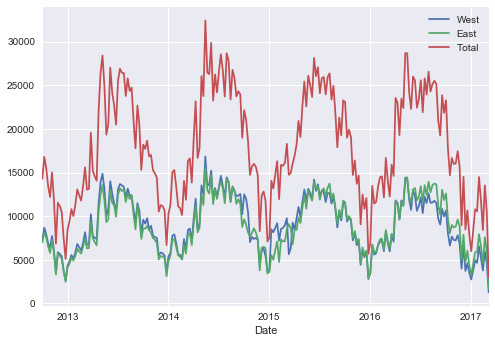

In [4]:
#data.columns =['West', 'East', 'Total']
data.resample('w').sum().plot();

    Above, we see the total number of rides, between 2013-2017. The data shows, rides 
    between the Fremont Bridge West and East Sidewalks. Some insights to infer from the 
    data, is that there about about 4,000 rides in the winter months and about 14,000 rides in the summer months. This is a starting point on exploring the data further. 

### Daily Trend

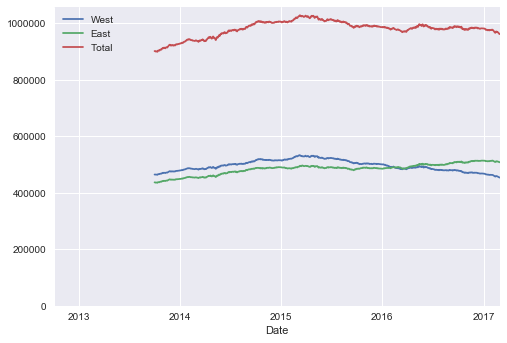

In [5]:
data ['Total'] =data['West']+data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

Above, we can see that the change between East and West is not as dramatic. However, there seems to be an offset around 2016, between the east and west walk. Lets add a new column with the total of the east and west. 

From the plot above, we see that annual trend, ie.the sum of daily rides in 365 days. From the plot, we can see:
 * West side on the bridge, there was an increase in rides, until year 2015, and decreased afer that. 
 
Next Step To get a better understanding, set the Y limit from zero to Max.

Above we can see the total bike rides, hovers approximately around one million/per, with some consistency from mid-2015 to current. 

### Hourly Trend: Look at the trend between individual days -groupby time of day. 

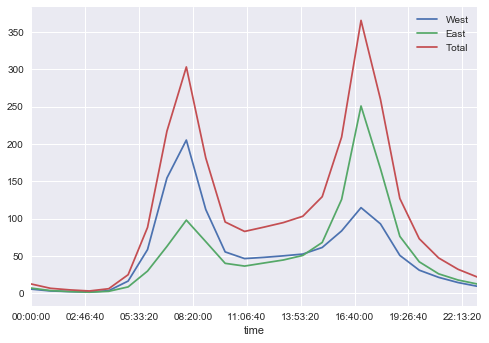

In [6]:
data.groupby(data.index.time).mean().plot();

* Total is 300 bikes around 8:00am
* West - 200 around 8:00am and slightly over 100 around 5:00pm.
* East - 100 around 8:00am and about 250 around 5:00pm. 

Thus looking at the plot above, we can see that the Westbound side peaks in the morning, while the Eastbound side. The total, shows some commute pattern of people going into the city on the westside in the morning and out of the city in the east side block in the afternoon.  

## Overall Trend: Now lets look at the whole data set-using pivot table

In [7]:
# column is 2d datafrom where each column is day and row corresponds to an hour during that day
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

2012-10-03  2012-10-04  2012-10-05  2012-10-06  2012-10-07
00:00:00        13.0        18.0        11.0        15.0        11.0
01:00:00        10.0         3.0         8.0        15.0        17.0
02:00:00         2.0         9.0         7.0         9.0         3.0
03:00:00         5.0         3.0         4.0         3.0         6.0
04:00:00         7.0         8.0         9.0         5.0         3.0

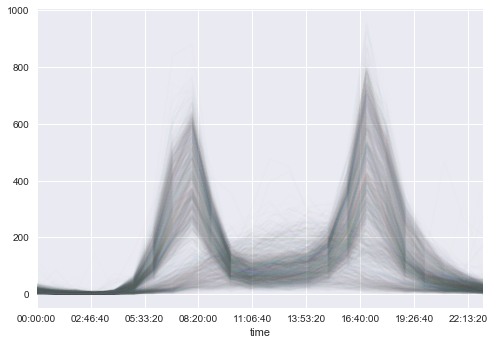

In [8]:
pivoted.plot(legend=False, alpha =0.01);

Looks like there is a bunch of days that have a bimodal commute patter, but also a bunch of days that have a broad peak and do not have a commute pattern, which peak around mid-day. Here we can hypothsize/assume that the days with a bimodal pattern are weekdays and the others with a broad commute patters are weekends or holidays. 